In [16]:
import mne
import numpy as np
import h5py
import matplotlib
import warnings
import sys

%matplotlib inline
warnings.filterwarnings("ignore")  # Ignor warnings
sys.path.insert(0, '/Users/basilminkov/Scripts/python3/Neuroimaging/nfblab_data/')
from nfblab_data import NFBLabData 

import matplotlib.pyplot as plt
from scipy.signal import firwin, filtfilt

fig_size = [8, 6]  # Set figure size
plt.rcParams["figure.figsize"] = fig_size

In [18]:
channels_path = "/Users/basilminkov/Scripts/python3/Neuroimaging/stat/chanlocs_mod.mat"
data_path = [
    "/Users/basilminkov/Neuroscience/Data/Test/19.02.17/dasha_1_02-19_21-00-01/",
    "/Users/basilminkov/Neuroscience/Data/Test/19.02.17/dasha_1_control_02-19_21-22-31/",
    "/Users/basilminkov/Neuroscience/Data/Test/19.02.17/dasha_2_02-19_21-33-49/",
            ]
data_list = [NFBLabData(data_path[i], channels_path) for i in range(len(data_path))]

Empty reference list!
Protocols: ['Baseline', 'Baseline', 'Baseline', 'Baseline', 'Baseline', 'Baseline', 'Baseline', 'Baseline', 'Baseline', 'Baseline']
Useful Protocols: []
Channels: ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'Ft9', 'Fc5', 'Fc1', 'Fc2', 'Fc6', 'Ft10', 'T3', 'C3', 'Cz', 'C4', 'T4', 'Tp9', 'Cp5', 'Cp1', 'Cp2', 'Cp6', 'Tp10', 'P7', 'P3', 'Pz', 'P4', 'P8', 'O1', 'Oz', 'O2']
References: []
Channels Locations: [[  8.07840138e+01   2.61330144e+01  -4.00108454e+00]
 [  8.07840138e+01  -2.61330144e+01  -4.00108454e+00]
 [  4.98713779e+01   6.84233350e+01  -7.48951836e+00]
 [  5.75510634e+01   4.82004273e+01   3.98697117e+01]
 [  6.07384809e+01  -0.00000000e+00   5.94629038e+01]
 [  5.75840261e+01  -4.81425965e+01   3.98919834e+01]
 [  4.99265268e+01  -6.83835903e+01  -7.48508507e+00]
 [  2.33016072e+01   7.00757987e+01  -4.20882114e+01]
 [  2.87628234e+01   7.62473645e+01   2.41669070e+01]
 [  3.24361839e+01   3.23513771e+01   7.15980612e+01]
 [  3.24361839e+01  -3.23513771

In [21]:
data_list[0].data_set[:, 28] # P4 electrode data

array([  7.81249980e-07,   4.54101564e-06,   5.95703114e-06, ...,
        -4.39453117e-07,  -2.92968735e-07,  -2.53906251e-06])

In [22]:
srate = 500
order = 400
band = np.array([7, 14])
b = firwin(order, band*2/srate, width=None, window='hamming', pass_zero=False)
a = 1

for i in range(len(data_list)):
    data_list[i] = filtfilt(b, a, data_list[i].data_set[:,28])

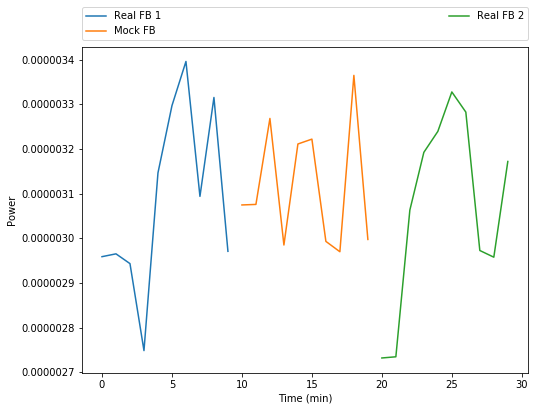

In [45]:
n_int = 10  # calculate power each minute 
plt.plot(np.arange(n_int*0, n_int), list(map(np.std, np.array_split(data_list[0], n_int))), label="Real FB 1")
plt.plot(np.arange(n_int, n_int*2), list(map(np.std, np.array_split(data_list[1], n_int))), label="Mock FB")
plt.plot(np.arange(n_int*2, n_int*3), list(map(np.std, np.array_split(data_list[2], n_int))), label="Real FB 2")
plt.xlabel("Time (min)")
plt.ylabel("Power")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()